In [22]:
import pandas as pd 
#for the importing dataset
import numpy as np
%matplotlib inline 
#to plot the whatever graphic
import matplotlib.pyplot as plt #plot data
#import common libaries
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

0        3861.9
1        3994.2
2        4060.3
3        4020.6
4        3928.1
         ...   
1807    14350.0
1808    15300.0
1809    16350.0
1810    17400.0
1811    18400.0
Name: price, Length: 1812, dtype: float64

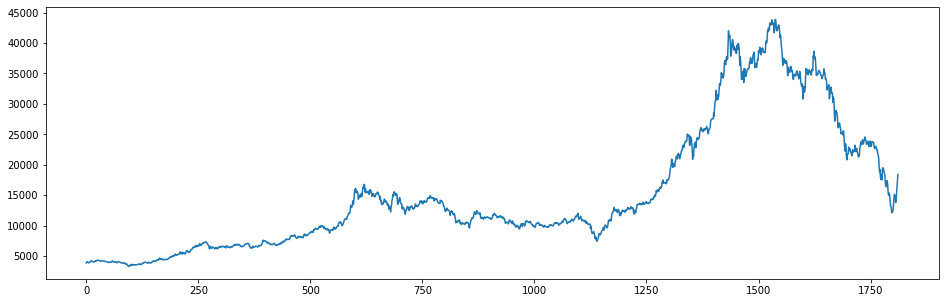

In [43]:
#import the dataset 
HPG=pd.read_csv(r"/content/HoaPhatdataset (3).csv")
# HPG.index = HPG['date']
# Convert the 'date' column to a datetime data type
HPG['date']=pd.to_datetime(HPG.date,format='%m/%d/%Y')
#set the date as the index
# HPG=HPG.set_index(pd.DatetimeIndex(HPG['date'].values))
HPG['Time'] = np.arange(len(HPG.index))
HPG['price'].plot(figsize=(16,5))
HPG['price']

,price,Open,High,Low,Time
count,1812.00000,1812.000000,1812.000000,1812.000000,1812.000000
mean,15288.53819,15294.660375,15508.131623,15089.505408,905.500000
std,10456.63874,10482.328760,10623.617303,10328.726382,523.223662
min,3280.00000,3187.400000,3293.200000,3161.000000,0.000000
25%,7739.47500,7728.450000,7808.575000,7660.925000,452.750000
50%,11578.70000,11605.100000,11727.400000,11435.350000,905.500000
75%,20906.90000,20704.500000,21422.550000,20470.600000,1358.250000
max,43895.80000,43895.800000,44198.500000,43517.400000,1811.000000


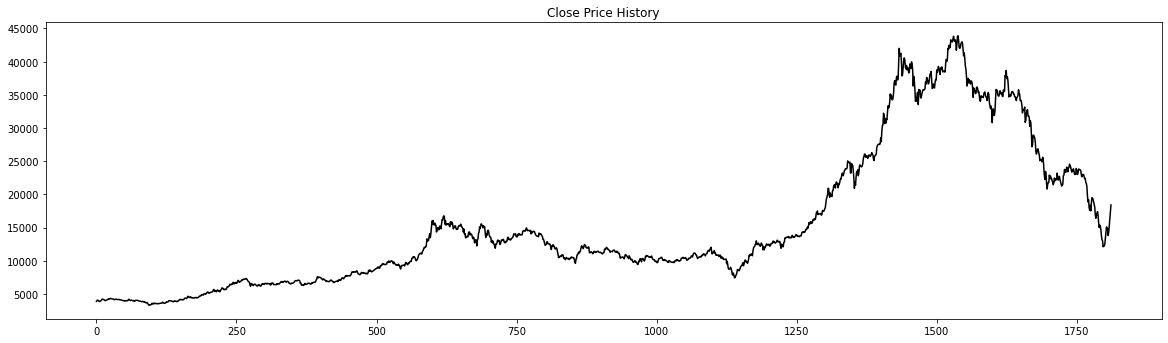

In [44]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Close Price History')
#the figure has 2 row, 1 columns, and this plot is the first plot. 
HPG['price'].plot(style="k")
# plt.subplot(2, 1, 2)
# #the figure has 2 row, 1 columns, and this plot is the second plot. 
# POW['Vol'].plot(style="k")
# plt.title('Volume History')
HPG.describe()

Kiem dinh ADF coi thu chuoi co nghiem don vi hay khong va tinh dung





In [45]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(HPG['price'].dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -1.4419547989839905 
p-value: 0.5620055177138557 
Critical value : {} 
	1%: -3.43401669852096
	5%: -2.863159643456451
	10%: -2.5676322468019896
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


The output above shows that the p-value is greater than the significance level of 0.05, so we fail to reject the null hypothesis. The series is not stationary and requires differencing.

In [46]:
from statsmodels.tsa.statespace.tools import diff
result = adfuller(HPG['price'].diff().dropna() )
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -6.387571006905839 
p-value: 2.145321497295357e-08 
Critical value : {} 
	1%: -3.43401669852096
	5%: -2.863159643456451
	10%: -2.5676322468019896
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [47]:
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pmdarima as pm

In [49]:
model  = pm.auto_arima(HPG['price'],
                      test='adf',       # use adftest to find optimal 'd' # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)     # set to stepwise
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26962.426, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26970.815, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26967.001, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26966.295, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26969.496, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26965.182, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26964.639, Time=0.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26956.610, Time=7.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26966.021, Time=2.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26956.315, Time=11.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=26967.147, Time=3.28 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=26951.608, Time=13.30 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=26960.740, Time=4.38 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.36 sec
 ARIMA(4,1,3)(0,0,0)[0]

In the above output, the lowest AIC value of Best model:  ARIMA(4,1,0), and that is used as the final estimator.

> Indented block





In [62]:
# Split the 'df1' DataFrame into train and test datasets
# Convert the 'df1' DataFrame to a NumPy array
data = HPG.values
# Calculate the number of rows to use for the train dataset
# Set 30% for testing
t = .7
t = int(t * len(HPG))

# Set 20% for testing
train = HPG[:t]
test = HPG[t:]

In [63]:
result = adfuller(train['price'].diff().dropna())
print('ADF Statistic: {} '.format(result[0]))
print('p-value: {} '.format(result[1]))
print('Critical value : {} ')
for key,value in result[4].items():
            print('\t{}: {}'.format(key, value))
if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

ADF Statistic: -6.2765966319484185 
p-value: 3.886967141120306e-08 
Critical value : {} 
	1%: -3.4356133204636095
	5%: -2.8638642784217305
	10%: -2.5680074748794373
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [64]:
#ignore the harmless Warning
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


In [65]:
model_2 = sm.tsa.arima.ARIMA(train['price'],order=(5,1,2))
# results = model.fit(disp=-1)
# results.summary()
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1268
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -8555.454
Date:                Tue, 03 Jan 2023   AIC                          17126.909
Time:                        07:50:28   BIC                          17168.064
Sample:                             0   HQIC                         17142.370
                               - 1268                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2041      0.025     -8.115      0.000      -0.253      -0.155
ar.L2         -0.8757      0.024    -36.531      0.000      -0.923      -0.829
ar.L3         -0.0751      0.027     -2.783      0.005      -0.128      -0.022
ar.L4          0.0911      0.021      4.435      0.000       0.051       0.131
ar.L5         -0.0827      0.022     -3.837      0.000      -0.125      -0.040
ma.L1          0.1931      0.017     11.078      0.000       0.159       0.227
ma.L2          0.9569      0.015     65.345      0.000       0.928       0.986
sigma2      4.372e+04   1096.320     39.883      0.000    4.16e+04    4.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               724.95
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               5.05   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
#Here’s how to predict the values using the ARIMA model:
predictions = results_2.predict()
print(predictions)

0           0.000000
1        3858.056469
2        4003.244539
3        4056.079028
4        4022.371506
            ...     
1263    14223.167910
1264    14411.454627
1265    14320.089678
1266    14300.316745
1267    14736.625187
Name: predicted_mean, Length: 1268, dtype: float64


In [67]:
# Obtain predicted values
start=len(train)
end=len(train) + len(test) - 1
predictions_2 = results_2.predict(start= len(train), end = ( len(HPG) - 1 ), dynamic=True, typ='levels').rename('ARIMA(4,1,0) Predictions TRAIN')
predictions_2
df = pd.DataFrame(predictions_2)
df

,"ARIMA(4,1,0) Predictions TRAIN"
1268,14746.669736
1269,14700.275486
1270,14691.068398
1271,14696.862881
1272,14714.650871
...,...
1807,14700.666505
1808,14700.520739
1809,14700.432178
1810,14700.592406


In [68]:
# #Thay the cot Price bằng cột dữ liệu Predictions

pred_2 = test.copy()
pred_2['price'] = df
pred_2

,date,price,Open,High,Low,Vol.,Change %,Time
1268,2020-09-30,14746.669736,14690.5,14802.1,14551.2,22.79M,0.19%,1268
1269,2020-10-01,14700.275486,14829.9,15164.4,14774.2,30.12M,2.27%,1269
1270,2020-10-02,14691.068398,15080.8,15192.3,14495.4,35.47M,-1.11%,1270
1271,2020-10-05,14696.862881,14969.3,15275.9,14969.3,22.45M,2.43%,1271
1272,2020-10-06,14714.650871,15303.8,15749.8,15164.4,41.44M,3.29%,1272
...,...,...,...,...,...,...,...,...
1807,2022-11-24,14700.666505,13700.0,14400.0,13600.0,31.12M,3.99%,1807
1808,2022-11-25,14700.520739,14600.0,15300.0,14350.0,26.53M,6.62%,1808
1809,2022-11-28,14700.432178,15600.0,16350.0,15600.0,58.84M,6.86%,1809
1810,2022-11-29,14700.592406,16600.0,17450.0,16350.0,64.31M,6.42%,1810


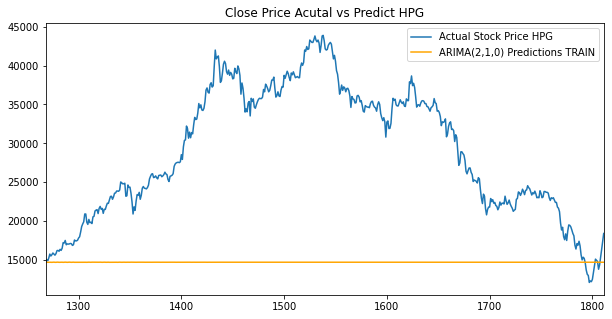

In [69]:
title = 'Close Price Acutal vs Predict HPG'
xlabel='' 
ax = test['price'].plot(figsize=(10,5),title=title,legend=True ,label='Actual Stock Price HPG')
# predictions.plot(legend=True)
pred_2['price'].plot(legend=True,color = 'orange',label='ARIMA(2,1,0) Predictions TRAIN')
ax.autoscale(axis='x',tight=True)

In [70]:
# #Train data
##lỗi trung bình bình phương RMSE(lỗi dự đoán) của tập test
#train model bằng tập train set
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae = mean_absolute_error(test['price'], pred_2['price'])
mape = mean_absolute_percentage_error(test['price'], pred_2['price'])
mse = mean_squared_error(test['price'], pred_2['price'])
rmse = np.sqrt(mse)
r2 = r2_score(test['price'], pred_2['price'])


print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 14338.83
MAPE: 44.71%
MSE: 272334814.70
RMSE: 16502.57
R2: -2.97
